In [1]:
!pip install fastai --upgrade
!pip install timm wwf

     |████████████████████████████████| 194kB 7.6MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 245kB 8.6MB/s 


In [2]:
#!wget https://www.dropbox.com/s/cb3g53z4pbtaqvl/erm.zip?dl=1 -O erm.zip
!wget https://unirioja-my.sharepoint.com/:u:/g/personal/magarcd_unirioja_es/ERU6UfU2RGREnYNl_KxSpkkB4NP42bHj6siEIWrQ7aWPAQ?download=1 -O erm.zip

--2021-03-03 15:25:11--  https://unirioja-my.sharepoint.com/:u:/g/personal/magarcd_unirioja_es/ERU6UfU2RGREnYNl_KxSpkkB4NP42bHj6siEIWrQ7aWPAQ?download=1
Resolving unirioja-my.sharepoint.com (unirioja-my.sharepoint.com)... 13.107.136.9
Connecting to unirioja-my.sharepoint.com (unirioja-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/magarcd_unirioja_es/Documents/erm.zip?originalPath=aHR0cHM6Ly91bmlyaW9qYS1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9tYWdhcmNkX3VuaXJpb2phX2VzL0VSVTZVZlUyUkdSRW5ZTmxfS3hTcGtrQjROUDQyYkhqNnNpRUlXclE3YVdQQVE_cnRpbWU9OGkwQmlsamUyRWc [following]
--2021-03-03 15:25:12--  https://unirioja-my.sharepoint.com/personal/magarcd_unirioja_es/Documents/erm.zip?originalPath=aHR0cHM6Ly91bmlyaW9qYS1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9tYWdhcmNkX3VuaXJpb2phX2VzL0VSVTZVZlUyUkdSRW5ZTmxfS3hTcGtrQjROUDQyYkhqNnNpRUlXclE3YVdQQVE_cnRpbWU9OGkwQmlsamUyRWc
Reusing existing connection to unirioja-my.sharepo

In [3]:
!unzip erm.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: erm/train/no/anonymized_1873542_fakeB.jpg  
  inflating: erm/train/no/anonymized_887511_fakeB.jpg  
  inflating: erm/train/no/anonymized_1351887_fakeB.jpg  
  inflating: erm/train/no/anonymized_1099051_fakeB.jpg  
  inflating: erm/train/no/anonymized_448602_fakeB.jpg  
  inflating: erm/train/no/anonymized_852019_fakeB.jpg  
  inflating: erm/train/no/anonymized_169973_fakeB.jpg  
  inflating: erm/train/no/anonymized_1241994_fakeB.jpg  
  inflating: erm/train/no/anonymized_1898489_fakeB.jpg  
  inflating: erm/train/no/anonymized_160483_fakeB.jpg  
  inflating: erm/train/no/anonymized_593874_fakeB.jpg  
  inflating: erm/train/no/anonymized_359235_fakeB.jpg  
  inflating: erm/train/no/anonymized_782889_fakeB.jpg  
  inflating: erm/train/no/anonymized_324102_fakeB.jpg  
  inflating: erm/train/no/anonymized_532397_fakeB.jpg  
  inflating: erm/train/no/anonymized_263513_fakeB.jpg  
  inflating: erm/train/no/anonymized_1

In [4]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *

In [5]:
path = Path('erm/')
trainPath = path/'train'
testPath = path/'test'

In [6]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(presize),
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

In [7]:
db512 = getDataBlock()
dls512 = db512.dataloaders(trainPath,bs=64)

In [8]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnet50')
]

In [9]:
import timm
timm.list_models('*resnet50*')

['cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'ecaresnet50',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'gluon_resnet50_v1b',
 'gluon_resnet50_v1c',
 'gluon_resnet50_v1d',
 'gluon_resnet50_v1s',
 'legacy_seresnet50',
 'resnet50',
 'resnet50d',
 'seresnet50',
 'seresnet50tn',
 'skresnet50',
 'skresnet50d',
 'ssl_resnet50',
 'swsl_resnet50',
 'tv_resnet50',
 'vit_base_resnet50d_224',
 'vit_small_resnet50d_s3_224',
 'wide_resnet50_2']

In [10]:
learn = timm_learner(dls512, 'resnet50d',cbs = callbacks,metrics=[accuracy,Precision(),Recall()]).to_fp16()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth" to /root/.cache/torch/hub/checkpoints/resnet50d_ra2-464e36ba.pth


In [ ]:
learn.lr_find()

KeyboardInterrupt: ignored

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.114677,0.993226,0.600458,0.637149,0.453846,00:57


Better model found at epoch 0 with valid_loss value: 0.9932259917259216.


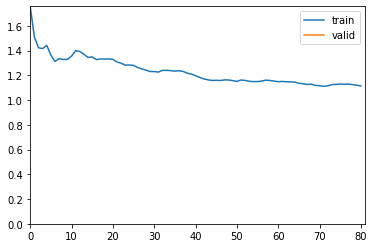

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.995482,0.783025,0.641711,0.676413,0.533846,00:59
1,0.902339,0.738840,0.644767,0.706013,0.487692,00:58
2,0.830981,0.673151,0.651643,0.653968,0.633846,00:59
3,0.728124,0.662143,0.653170,0.716814,0.498462,00:59
4,0.663208,0.610973,0.656990,0.660287,0.636923,00:59
5,0.626449,0.602555,0.675325,0.699115,0.607692,00:59
6,0.594958,0.588932,0.673797,0.702359,0.595385,01:00
7,0.577199,0.592264,0.673033,0.678457,0.649231,00:59
8,0.573061,0.586616,0.669213,0.690685,0.604615,01:00
9,0.560167,0.586307,0.680672,0.689542,0.649231,01:00


Better model found at epoch 0 with valid_loss value: 0.7830245494842529.


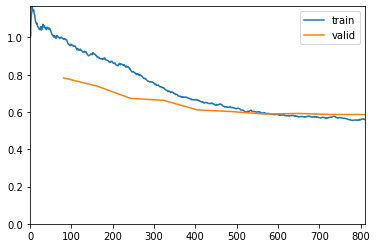

Better model found at epoch 1 with valid_loss value: 0.7388401031494141.
Better model found at epoch 2 with valid_loss value: 0.6731505990028381.
Better model found at epoch 3 with valid_loss value: 0.6621426343917847.
Better model found at epoch 4 with valid_loss value: 0.6109729409217834.
Better model found at epoch 5 with valid_loss value: 0.6025547385215759.
Better model found at epoch 6 with valid_loss value: 0.5889319777488708.
Better model found at epoch 8 with valid_loss value: 0.5866163969039917.
Better model found at epoch 9 with valid_loss value: 0.5863066911697388.


In [11]:
learn.fine_tune(10,base_lr=1e-3)

In [12]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

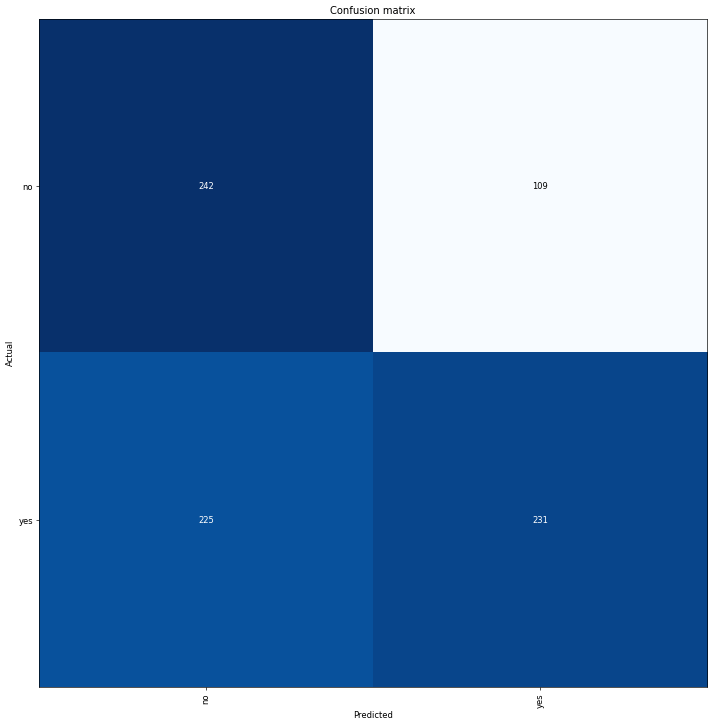

In [13]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [14]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5861214399337769.


(#4) [0.6963433623313904,0.5861214399337769,0.6794117647058824,0.506578947368421]

In [15]:
learn.export(fname='resnet50.pkl')